In [144]:
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.datasets import mnist

In [145]:
(x_treino, y_treino),(x_teste, y_teste) = mnist.load_data()

In [146]:
y_treino

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [147]:
from keras.utils import np_utils

In [148]:
y_treino_convertido = np_utils.to_categorical(y_treino)
y_teste_convertido = np_utils.to_categorical(y_teste)

In [149]:
y_treino_convertido #verificando se converteu corretamente

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

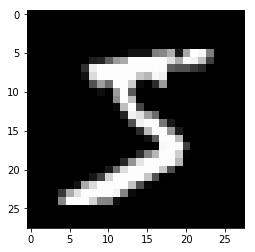

In [150]:
import matplotlib.pyplot as plt
plt.imshow(x_treino[0], cmap='gray') #imprimindo uma das amostras

<b>Reshape: Colocando as imagens (amostras) no formato de única linha</b>

In [151]:
x_treino_remodelado = x_treino.reshape((60000,784))
x_teste_remodelado = x_teste.reshape((10000,784))

In [152]:
x_treino_remodelado.shape #testando se deu certo

(60000, 784)

<b>Normalizando os dados (entre 0 e 1):</b>

In [153]:
x_teste_normalizado = x_teste_remodelado.astype('float32')/255
x_treino_normalizado = x_treino_remodelado.astype('float32')/255

In [154]:
x_teste_normalizado #verificando se due certo

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<h3>Criando a minha rede...</h3>

In [155]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [156]:
modelo = Sequential()
modelo.add(Dense(30, input_dim=784, kernel_initializer='normal', activation='relu')) #entrada e primeira camada
modelo.add(Dense(30, kernel_initializer='normal', activation='relu')) #segunda camada
modelo.add(Dense(10, kernel_initializer='normal', activation='softmax')) #saída

In [157]:
from keras.optimizers import SGD

In [158]:
otimizador = SGD()

In [159]:
modelo.compile(loss='categorical_crossentropy', optimizer=otimizador, metrics=['acc'])
historico = modelo.fit(x_treino_normalizado, y_treino_convertido, epochs=200, batch_size=100, validation_data=(x_teste_normalizado, y_teste_convertido), verbose=1) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 22us/step - loss: 2.2899 - acc: 0.2050 - val_loss: 2.2651 - val_acc: 0.2542
Epoch 2/200
60000/60000 [==============================] - 1s 20us/step - loss: 2.1130 - acc: 0.3122 - val_loss: 1.7799 - val_acc: 0.4672
Epoch 3/200
60000/60000 [==============================] - 1s 20us/step - loss: 1.2984 - acc: 0.6165 - val_loss: 0.8921 - val_acc: 0.7368
Epoch 4/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.7356 - acc: 0.7789 - val_loss: 0.6093 - val_acc: 0.8128
Epoch 5/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.5648 - acc: 0.8335 - val_loss: 0.5042 - val_acc: 0.8526
Epoch 6/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.4850 - acc: 0.8594 - val_loss: 0.4463 - val_acc: 0.8684
Epoch 7/200
60000/60000 [==============================] - 2s 27us/step - loss: 0.4362 - acc: 0.8743 - val_loss: 0.4077 - 

60000/60000 [==============================] - 1s 21us/step - loss: 0.1307 - acc: 0.9621 - val_loss: 0.1448 - val_acc: 0.9574
Epoch 60/200
60000/60000 [==============================] - 1s 24us/step - loss: 0.1293 - acc: 0.9626 - val_loss: 0.1447 - val_acc: 0.9575
Epoch 61/200
60000/60000 [==============================] - 2s 26us/step - loss: 0.1276 - acc: 0.9629 - val_loss: 0.1474 - val_acc: 0.9565
Epoch 62/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.1264 - acc: 0.9634 - val_loss: 0.1421 - val_acc: 0.9580
Epoch 63/200
60000/60000 [==============================] - 2s 25us/step - loss: 0.1246 - acc: 0.9641 - val_loss: 0.1431 - val_acc: 0.9578
Epoch 64/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1230 - acc: 0.9646 - val_loss: 0.1413 - val_acc: 0.9577
Epoch 65/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.1217 - acc: 0.9648 - val_loss: 0.1409 - val_acc: 0.9584
Epoch 66/200
60000/60000 [==============

Epoch 118/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.0745 - acc: 0.9785 - val_loss: 0.1120 - val_acc: 0.9659
Epoch 119/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.0738 - acc: 0.9790 - val_loss: 0.1119 - val_acc: 0.9649
Epoch 120/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.0732 - acc: 0.9790 - val_loss: 0.1125 - val_acc: 0.9651
Epoch 121/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.0726 - acc: 0.9793 - val_loss: 0.1130 - val_acc: 0.9639
Epoch 122/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.0720 - acc: 0.9795 - val_loss: 0.1106 - val_acc: 0.9657
Epoch 123/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.0717 - acc: 0.9795 - val_loss: 0.1116 - val_acc: 0.9650
Epoch 124/200
60000/60000 [==============================] - 2s 26us/step - loss: 0.0710 - acc: 0.9797 - val_loss: 0.1102 - val_acc: 0.9655
Epoch 125/200
60000/

60000/60000 [==============================] - 1s 19us/step - loss: 0.0485 - acc: 0.9864 - val_loss: 0.1101 - val_acc: 0.9664
Epoch 177/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0482 - acc: 0.9866 - val_loss: 0.1113 - val_acc: 0.9666
Epoch 178/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.0478 - acc: 0.9869 - val_loss: 0.1105 - val_acc: 0.9667
Epoch 179/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.0474 - acc: 0.9872 - val_loss: 0.1094 - val_acc: 0.9667
Epoch 180/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.0471 - acc: 0.9871 - val_loss: 0.1109 - val_acc: 0.9659
Epoch 181/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0468 - acc: 0.9870 - val_loss: 0.1117 - val_acc: 0.9657
Epoch 182/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.0465 - acc: 0.9871 - val_loss: 0.1125 - val_acc: 0.9662
Epoch 183/200
60000/60000 [=======

In [161]:
acc_treino = historico.history['acc']
acc_teste = historico.history['val_acc']
epochs = range(1, len(acc_treino)+1)

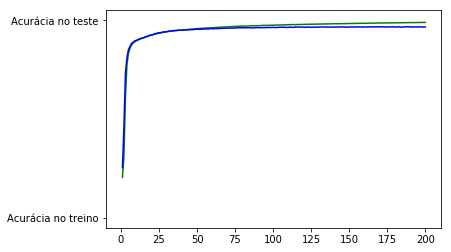

In [162]:
plt.plot(epochs, acc_treino, '-g', "Acurácia no treino")
plt.plot(epochs, acc_teste, '-b', 'Acurácia no teste')
#plt.xlabel("epochs")
#plt.ylabel("acurácia")
plt.show()